Ratul Pradhan


DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [3]:
import pandas as pd

mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col:>25} - {mushrooms_df[col].unique()}')

  0.                      type - ['p' 'e']
  1.                 cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2.               cap_surface - ['s' 'y' 'f' 'g']
  3.                 cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4.                   bruises - ['t' 'f']
  5.                      odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6.           gill_attachment - ['f' 'a']
  7.              gill_spacing - ['c' 'w']
  8.                 gill_size - ['n' 'b']
  9.                gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10.               stalk_shape - ['e' 't']
 11.                stalk_root - ['e' 'c' 'b' 'r' '?']
 12.  stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13.  stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14.    stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15.    stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16.                 veil_type - ['p']
 17.                veil_color - ['w' 'n' 'o' 'y']
 18.          

In [4]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pprint

# Ordinal Encoding:
# gill attachment 
# gill spacing 
# gill size  
# stalk shape
# bruises  
# ring number 
# Population

# Ordinal encoding for specified features
ord_features = ['bruises', 'gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape', 'ring_number', 'population']

Y = mushrooms_df['type']
print(Y)

mushrooms_df = mushrooms_df.drop(columns=['type'])
# Convert the categorical features to a list
mushrooms_df_categorial = mushrooms_df.drop(columns=ord_features)
mushrooms_df_ordinal = mushrooms_df[ord_features]


ordEnc = OrdinalEncoder(
    categories=[ ['f', 't' ],['f','a'],['c','w'], ['n','b'], ['e','t'], ['n','o','t'], ['y','v','s','n','c','a']])


ohe = OneHotEncoder(sparse_output=True)

col_trans = ColumnTransformer(
    transformers=[
        ('ord', ordEnc, ord_features),
        ('cat', ohe, mushrooms_df_categorial.columns.tolist())

    ]
)

# Fit and transform the original dataframe
X_trans = col_trans.fit_transform(mushrooms_df)

pprint.pprint(X_trans.__dict__)

# Change the sparse matrix to a dense matrix in a DataFrame
X_trans = pd.DataFrame(X_trans.toarray(), columns=col_trans.get_feature_names_out())




0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: type, Length: 8124, dtype: object
{'_has_canonical_format': True,
 '_has_sorted_indices': True,
 '_shape': (8124, 105),
 'data': array([1., 1., 2., ..., 1., 1., 1.]),
 'indices': array([  0,   5,   6, ...,  88,  93, 100], dtype=int32),
 'indptr': array([     0,     18,     37, ..., 151441, 151459, 151478], dtype=int32),
 'maxprint': 50}


In [5]:
X_trans


,ord__bruises,ord__gill_attachment,ord__gill_spacing,ord__gill_size,ord__stalk_shape,ord__ring_number,ord__population,cat__cap_shape_b,cat__cap_shape_c,cat__cap_shape_f,...,cat__spore_print_color_u,cat__spore_print_color_w,cat__spore_print_color_y,cat__habitat_d,cat__habitat_g,cat__habitat_l,cat__habitat_m,cat__habitat_p,cat__habitat_u,cat__habitat_w
0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,1.0,0.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,1.0,0.0,1.0,0.0,1.0,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
labEnc = LabelEncoder()
Y_trans = labEnc.fit_transform(Y)

label_names = labEnc.classes_


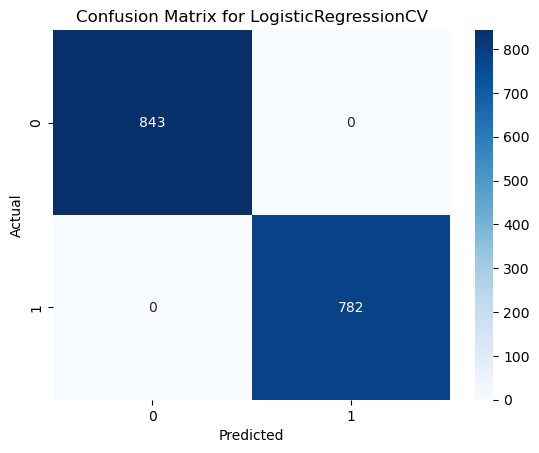

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
{'Logistic_Regression': {'accuracy': 1.0,
                         'best_params': array([2.7825594]),
                         'confusion_matrix': array([[843,   0],
       [  0, 782]]),
                         'precision': 1.0,
                         'predictions': array([0, 1, 1, ..., 1, 1, 1]),
                         'recall': 1.0}}


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_trans, Y_trans, test_size=0.2, random_state=42)

lr_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42).fit(X_train, y_train)
y_pred_lr_cv = lr_cv.predict(X_test)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr_cv)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LogisticRegressionCV')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred_lr_cv))
print("Recall:", recall_score(y_test, y_pred_lr_cv))
print("Precision:", precision_score(y_test, y_pred_lr_cv))

Models = {}
Models["Logistic_Regression"] = {
    "predictions": y_pred_lr_cv,
    "accuracy": accuracy_score(y_test, y_pred_lr_cv),
    "recall": recall_score(y_test, y_pred_lr_cv),
    "precision": precision_score(y_test, y_pred_lr_cv),
    "confusion_matrix": cm,
    "best_params": lr_cv.C_
}

pprint.pprint(Models)


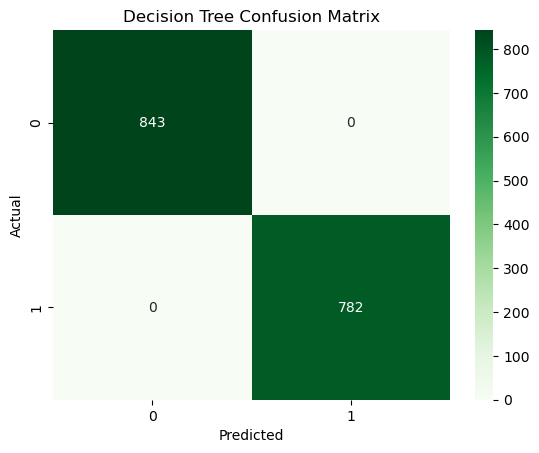

Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import seaborn as sns

import matplotlib.pyplot as plt

param_grid = {
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid, cv=5)
grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Decision Tree Best Parameters:", grid_dt.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))

Models["Decision_Tree"] = {
    "predictions": y_pred_dt,
    "accuracy": accuracy_score(y_test, y_pred_dt),
    "recall": recall_score(y_test, y_pred_dt),
    "precision": precision_score(y_test, y_pred_dt),
    "confusion_matrix": cm_dt,
    "best_params": grid_dt.best_params_
}

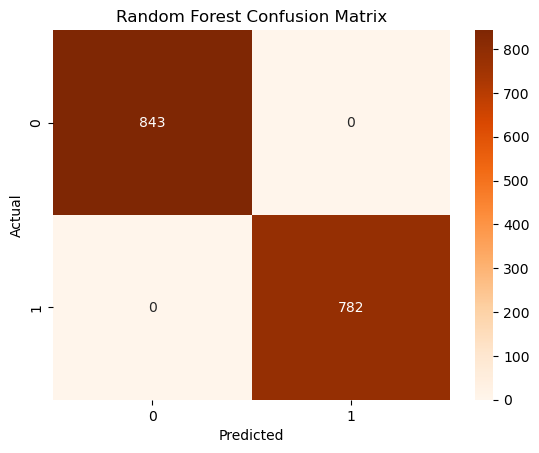

Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5]
}

# Initialize and run GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

# Plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print metrics and best parameters
print("Random Forest Best Parameters:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))

# Log the model's results in the Models dictionary
Models["Random_Forest"] = {
    "predictions": y_pred_rf,
    "accuracy": accuracy_score(y_test, y_pred_rf),
    "recall": recall_score(y_test, y_pred_rf),
    "precision": precision_score(y_test, y_pred_rf),
    "confusion_matrix": cm_rf,
    "best_params": grid_rf.best_params_
}

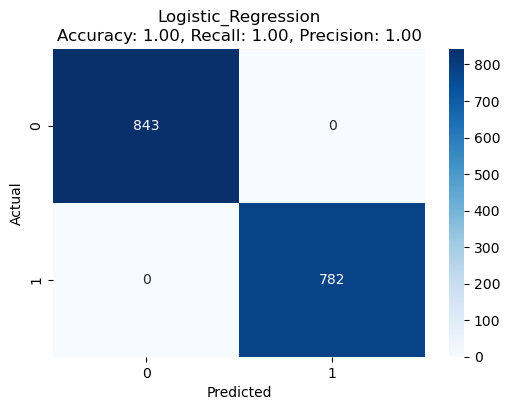

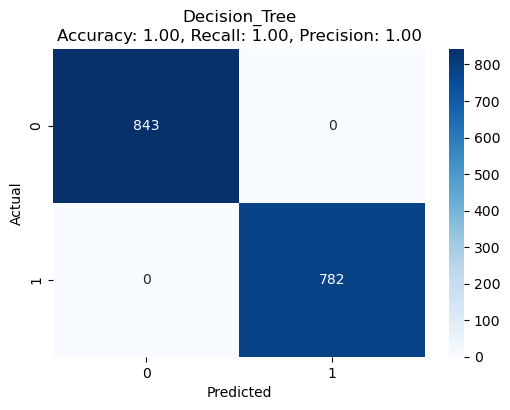

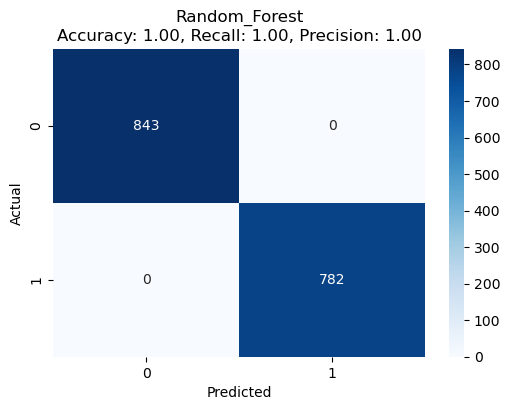

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

for name, model_info in Models.items():
    cm = model_info["confusion_matrix"]
    acc = model_info["accuracy"]
    rec = model_info["recall"]
    prec = model_info["precision"]
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name}\nAccuracy: {acc:.2f}, Recall: {rec:.2f}, Precision: {prec:.2f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### Problem 1 questions

 - Which model was best?
    - All three were perfect
 - What were the hyper-parameters of this model.
    - LR - LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
    - Decision Tree - 
        - "max_depth": [None, 5, 10, 15, 20],
        - "min_samples_split": [2, 5, 10],
        - "criterion": ["gini", "entropy"]
    - Random Forest 
        - 'n_estimators': [50, 100, 200],
        - 'max_depth': [None, 5, 10, 15],
        - 'min_samples_split': [2, 5]


 - What were the accuracy, recall, and precision of the model.
    - NA all were 1
 - Of accuracy, recall, precision, which did you use to decide the best model.
    - NA all were 1

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [38]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

nfl_draft.head()

nfl_draft["day"] = nfl_draft["round"].apply(lambda x: 1 if x == 1 else (2 if x in [2, 4] else 3))
nfl_draft = nfl_draft.drop(columns=["round"])

nfl_draft

,Unnamed: 0,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle,day
0,0,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN,1
1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83,1
2,2,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN,1
3,3,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04,1
4,4,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,2795,2024,Marcus Harris,23.0,DL,Southeastern Conference,6.166667,286.0,5.06,29.5,103.0,NaN,NaN,3
2299,2797,2024,Tatum Bethune,23.0,LB,Atlantic Coast Conference,6.000000,229.0,NaN,NaN,NaN,NaN,NaN,3
2300,2798,2024,Jaylen Harrell,22.0,DL,Big Ten Conference,6.333333,250.0,NaN,37.0,118.0,NaN,NaN,3
2301,2799,2024,Kalen King,21.0,DB,Big Ten Conference,5.916667,191.0,4.61,37.0,122.0,NaN,4.16,3


In [39]:
y = nfl_draft["day"]
X = nfl_draft.drop(columns=["day", "Unnamed: 0", "season", "name", "position", "college_conference"])

X.head(10)

,age,height,weight,forty,vertical,broad_jump,cone,shuttle
0,21.0,6.083333,317.0,5.15,NaN,NaN,NaN,NaN
1,25.0,5.833333,189.0,4.37,41.0,136.0,6.88,3.83
2,22.0,6.250000,313.0,5.10,NaN,NaN,NaN,NaN
3,23.0,6.416667,304.0,4.81,30.0,112.0,7.66,5.04
4,20.0,6.250000,262.0,4.84,NaN,NaN,NaN,NaN
5,22.0,5.916667,199.0,4.38,39.0,127.0,6.87,4.32
6,23.0,6.333333,322.0,5.20,NaN,NaN,NaN,NaN
7,22.0,6.416667,307.0,5.10,NaN,NaN,NaN,NaN
8,22.0,6.333333,281.0,4.87,30.5,109.0,NaN,NaN
9,24.0,6.166667,264.0,4.67,34.0,117.0,7.28,4.58


In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,age,height,weight,forty,vertical,broad_jump,cone,shuttle
0,-1.544868,-0.258091,1.850122,1.971512,NaN,NaN,NaN,NaN
1,2.870156,-1.624488,-1.233247,-1.305227,1.764161,2.135647,-0.854835,-2.155480
2,-0.441112,0.652841,1.753767,1.761465,NaN,NaN,NaN,NaN
3,0.662644,1.563772,1.536967,0.543190,-1.108166,-0.735398,1.393349,3.063498
4,-2.648624,0.652841,0.525237,0.669219,NaN,NaN,NaN,NaN


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=5)
grid_rf.fit(X_train, y_train)

y_pred = grid_rf.best_estimator_.predict(X_test)



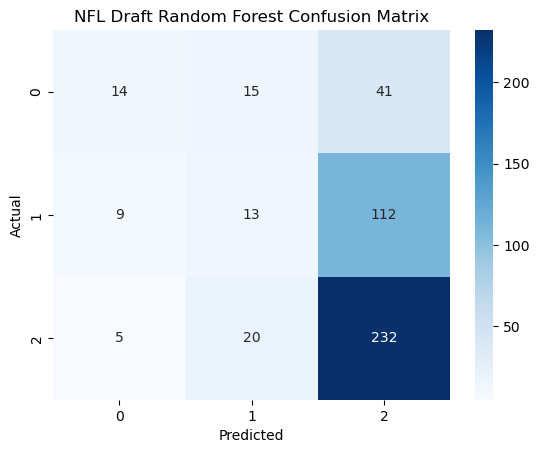

Accuracy: 0.561822125813449
Recall: 0.39991288692723154
Precision: 0.4578102453102453


In [44]:
cm_nfl = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_nfl, annot=True, fmt="d", cmap="Blues")
plt.title("NFL Draft Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

acc_nfl = accuracy_score(y_test, y_pred)
rec_nfl = recall_score(y_test, y_pred, average='macro')
prec_nfl = precision_score(y_test, y_pred, average='macro')

print("Accuracy:", acc_nfl)
print("Recall:", rec_nfl)
print("Precision:", prec_nfl)

In [45]:
# More Complex Model
# Using Imputer to handle missing values


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

features = X.columns.tolist()  
numeric_transformer =  Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, features)
])

X_pre = preprocessor.fit_transform(X)

X_pre = pd.DataFrame(X_pre, columns=features)



Best parameters for Regularized Logistic Regression: {'C': 0.01, 'penalty': 'l2'}
Regularized Logistic Regression Accuracy: 0.5639913232104121
              precision    recall  f1-score   support

           1       0.64      0.13      0.21        70
           2       0.18      0.03      0.05       134
           3       0.58      0.96      0.72       257

    accuracy                           0.56       461
   macro avg       0.47      0.37      0.33       461
weighted avg       0.47      0.56      0.45       461



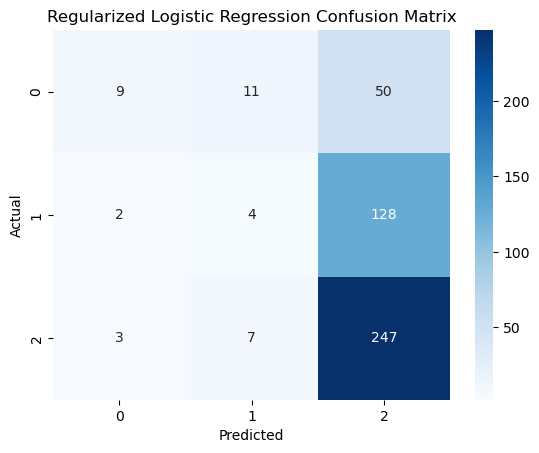

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.2, random_state=42)

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Note: Using saga solver to support both L1 and L2 penalties with multi_class='multinomial'
lr_reg = LogisticRegression( solver='saga', max_iter=10000)

grid_lr_reg = GridSearchCV(lr_reg, param_grid_lr, cv=5)
grid_lr_reg.fit(X_train, y_train)

print("Best parameters for Regularized Logistic Regression:", grid_lr_reg.best_params_)
y_pred_lr_reg = grid_lr_reg.predict(X_test)

acc_lr_reg = accuracy_score(y_test, y_pred_lr_reg)
print("Regularized Logistic Regression Accuracy:", acc_lr_reg)
print(classification_report(y_test, y_pred_lr_reg))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_reg), annot=True, fmt="d", cmap="Blues")
plt.title("Regularized Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
    - I used Random Forest for the first time
    - Second time, I used an imputer to fill missing values and then used Logistic Regression
 - What was your accuracy?
    - Both models gave 0.56 as best accuracy.